In [34]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [16]:
document_data = pd.read_csv("data.csv")

In [28]:
document_data.head()

,0.077257,0.000000,0.000000.1,0.000000.2,0.000000.3,0.000000.4,0.000000.5,0.000000.6,0.000000.7,0.000000.8,...,0.000000.2102,0.000000.2103,0.000000.2104,0.000000.2105,0.000000.2106,0.000000.2107,0.000000.2108,0.000000.2109,0.000000.2110,0.000000.2111
0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.055755,0.0,0.0
1,0.04225,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.093693,0.0,0.099296,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.069105,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.036811,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.000000,0.041917,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.029440,0.0,0.0


## Discover the number of groups present in the data or a reliable range of possible values

#### With 10 clusters

In [37]:
X_train, X_test = train_test_split(document_data, test_size=0.33, random_state=42)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
y_hat = kmeans.predict(X_test)

In [38]:
y_hat[:10]

array([4, 1, 1, 4, 1, 4, 1, 1, 7, 5], dtype=int32)

Verificando o segundo, terceiro e quinto arquivos, eles realmente são de assuntos parecidos, ou seja, conseguimos captar alguma coisa que fizesse sentido :)

#### With 20 clusters

In [45]:
X_train, X_test = train_test_split(document_data, test_size=0.33, random_state=42)

kmeans = KMeans(n_clusters=20, random_state=0).fit(X_train)
y_hat = kmeans.predict(X_test)

In [46]:
y_hat[:20]

array([ 1,  5,  3,  3, 18,  5,  0,  0, 14,  8,  3,  9,  0,  1,  5,  7,  5,
       18,  3, 16], dtype=int32)

Olhando os arquivos que ele agrupou em um mesmo grupo, pude perceber que não fez muito sentido. Não eram arquivos com assuntos similares :(

#### With 30 clusters

In [41]:
X_train, X_test = train_test_split(document_data, test_size=0.33, random_state=42)

kmeans = KMeans(n_clusters=30, random_state=0).fit(X_train)
y_hat = kmeans.predict(X_test)

In [44]:
y_hat[:30]

array([21, 15, 18, 25,  2,  4, 25,  9, 26, 16, 25, 12,  9, 25, 29, 13, 15,
        2,  4,  9, 21,  0, 15,  8,  2,  2,  4, 13,  4, 19], dtype=int32)

Olhando os arquivos que ele agrupou em um mesmo grupo, pude perceber que não fez muito sentido. Não eram arquivos com assuntos similares :(

---------------------------------------------------------------------------------------------

## Vamos utilizar agora a técnica de redução de dimensão, PCA

Aqui utilizamos o PCA para reduzirmos para duas dimensões, assim conseguimos plotar o gráfico e verificar visualmente como ficou a distribuição que foi feita :)

In [20]:
document_data.shape

(19923, 2209)

In [31]:
np.random.seed(42)

n_samples, n_features = document_data.shape
n_digits = 50 ## number of clusters

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


n_digits: 50, 	 n_samples 19923, 	 n_features 2209
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


In [32]:

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

k-means++	0.65s	36939	0.866	0.553	0.675	0.360	0.537	0.121
random   	0.42s	39597	0.868	0.533	0.661	0.316	0.516	0.096
PCA-based	0.05s	40617	0.850	0.575	0.686	0.456	0.560	0.107
__________________________________________________________________________________


### Utilizando a clusterização para 50 Clusters temos o seguinte:

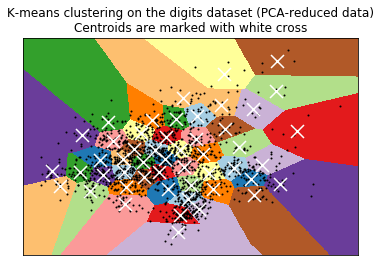

In [47]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=50, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Utilizando a clusterização para 10 Clusters temos o seguinte:

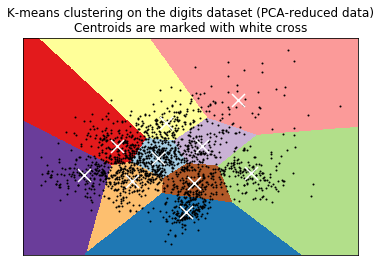

In [48]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Utilizando a clusterização para 20 Clusters temos o seguinte:

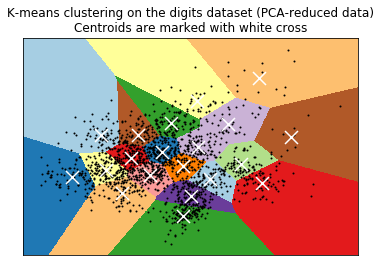

In [49]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=20, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Algumas conclusões que tiramos usando o PCA

Sem dúvida a predição ficou muito mais rápida e isso faz bastante sentido mesmo, porque antes tinhamos mais de 2k de features.
Eliminar features que não são necessárias para o aprendizado do algoritmo.
Conseguimos reduzir para 2 dimensões e, assim, visualizar a distribuição em um scatter plot, o que facilita muito a compreensão dos dados :)